In [1]:
import matplotlib.pyplot as plt
import sys
import os
from google.colab import files

In [5]:
PATH_FILES = {
    "fcfs_path": "fcfs_path.txt",
    "scan_path": "scan_path.txt",
    "cscan_path": "cscan_path.txt"
}
EXPECTED_FILES = list(PATH_FILES.values())

Por favor, sube tus 3 archivos de ruta generados por C++:
(fcfs_path.txt, scan_path.txt, cscan_path.txt)


Saving cscan_path.txt to cscan_path.txt
Saving fcfs_path.txt to fcfs_path.txt
Saving scan_path.txt to scan_path.txt

Archivos subidos exitosamente.
Leyendo archivos de ruta (.txt)...
Calculando movimiento total desde los datos de ruta...
Datos leídos exitosamente. Generando gráficos...
Mostrando gráfico de barras de comparación...


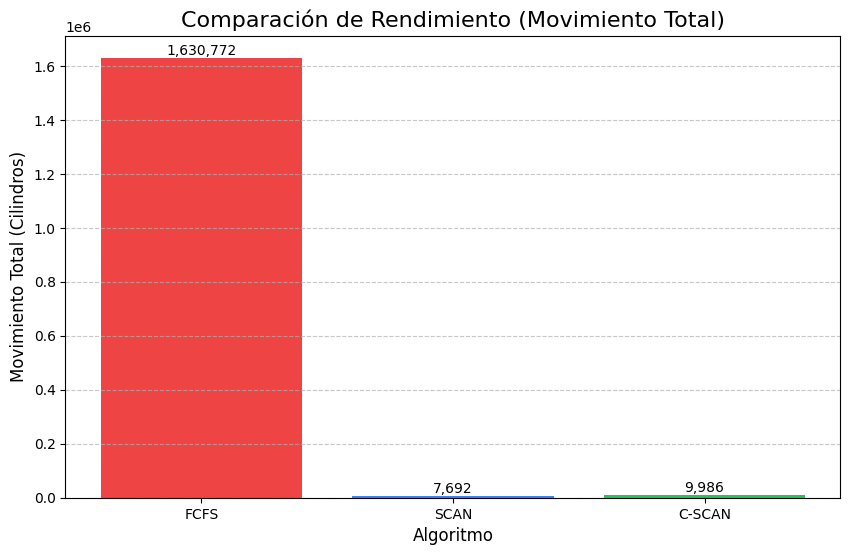

Mostrando gráficos de ruta del cabezal...


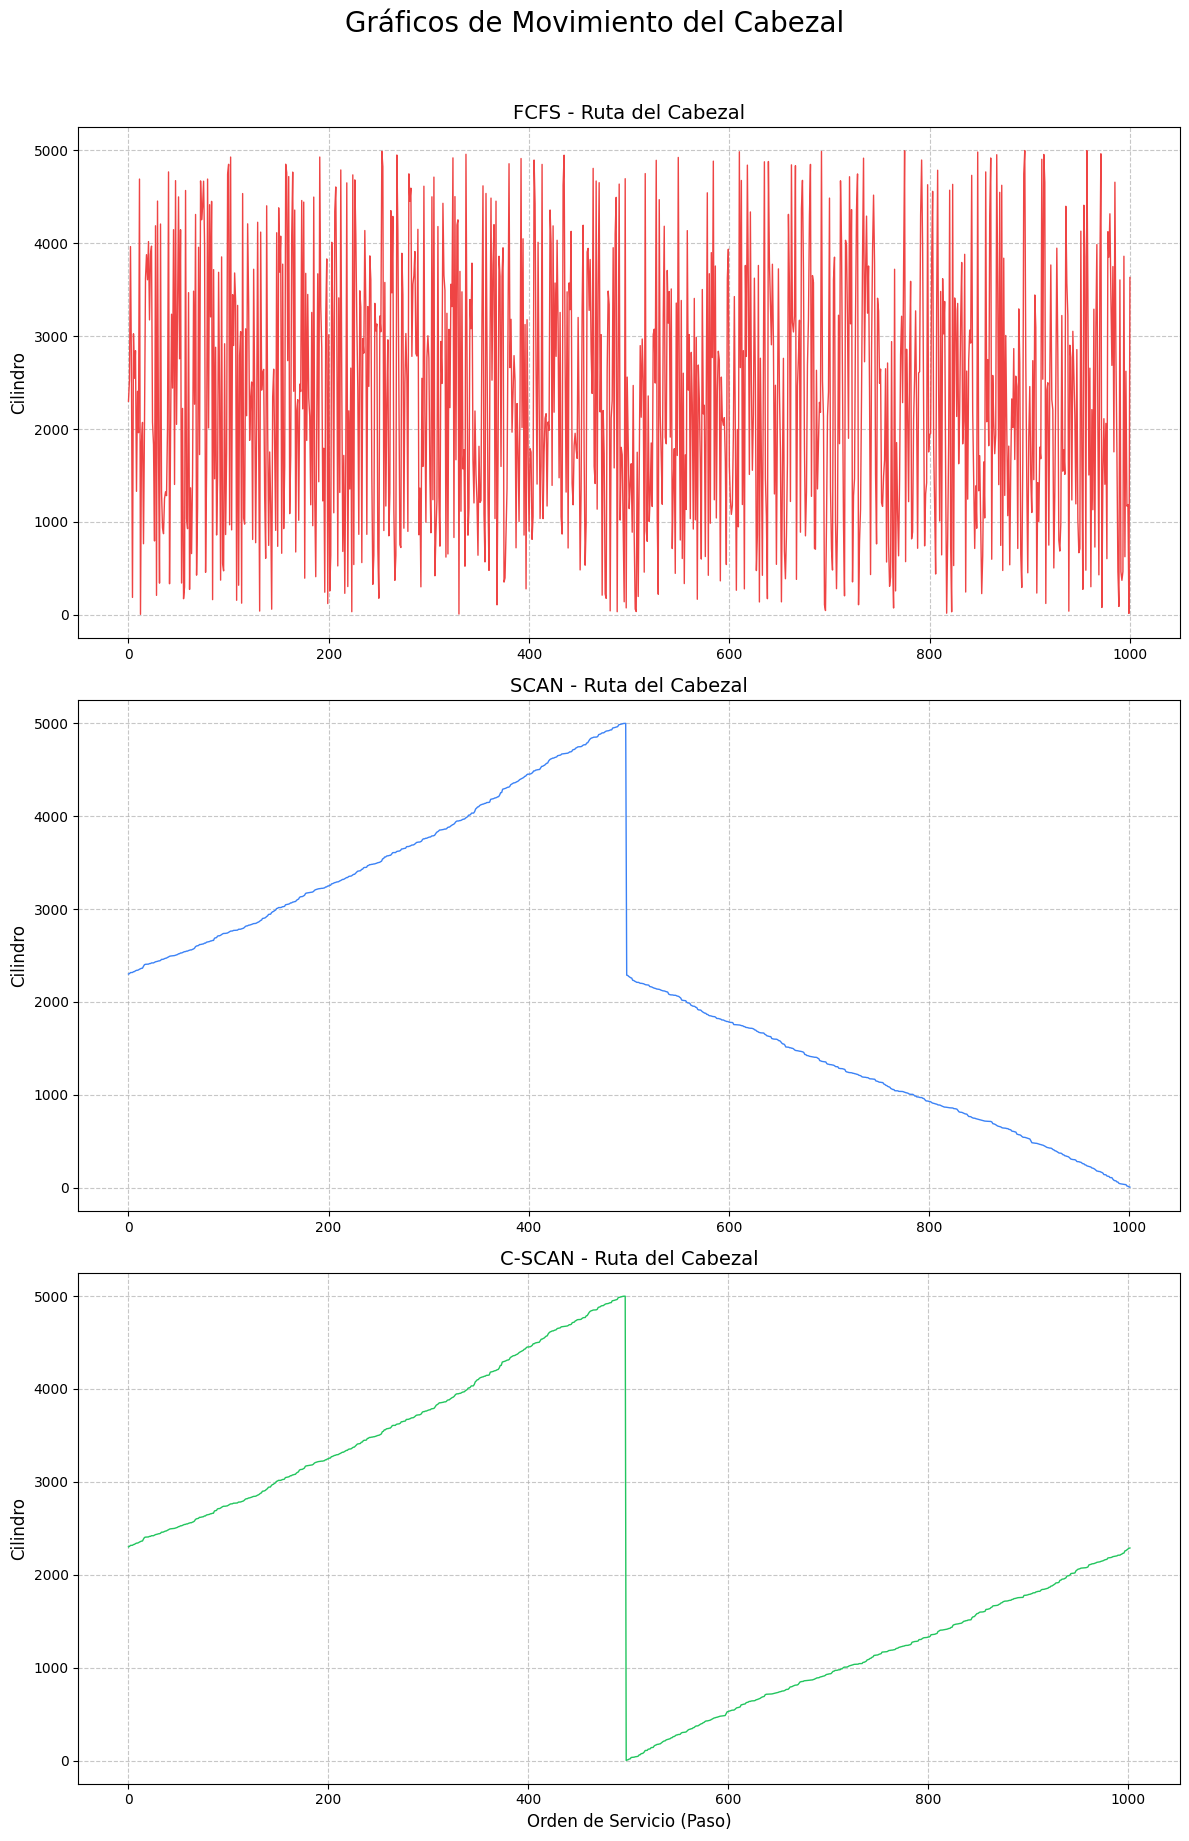


Visualización completada.
Limpiando archivos de datos temporales...


In [7]:
def calculate_movement_from_path(path):
    """Calcula el movimiento total de cabezal desde una lista de ruta."""
    if not path: # Manejar caso de lista vacía
        return 0
    movement = 0
    for i in range(1, len(path)):
        movement += abs(path[i] - path[i - 1])
    return movement

def parse_data_from_files():
    """
    Lee todos los datos desde los archivos .txt subidos al entorno de Colab
    y calcula el movimiento total.
    """
    data = {
        "fcfs_path": [],
        "scan_path": [],
        "cscan_path": [],
        "fcfs_movement": 0,
        "scan_movement": 0,
        "cscan_movement": 0
    }

    # 1. Leer las rutas desde los archivos .txt
    print("Leyendo archivos de ruta (.txt)...")
    try:
        for key, filename in PATH_FILES.items():
            if not os.path.exists(filename):
                raise FileNotFoundError(f"{filename} no encontrado o no subido.")
            with open(filename, "r") as f:
                data[key] = [int(v) for v in f.read().strip().split()]
    except FileNotFoundError as e:
        print(f"Error: {e}")
        print("Asegúrate de haber subido todos los 3 archivos .txt.")
        return None
    except Exception as e:
        print(f"Error leyendo los archivos de ruta: {e}")
        return None

    # 2. Calcular el movimiento total a partir de las rutas leídas
    print("Calculando movimiento total desde los datos de ruta...")
    try:
        data['fcfs_movement'] = calculate_movement_from_path(data['fcfs_path'])
        data['scan_movement'] = calculate_movement_from_path(data['scan_path'])
        data['cscan_movement'] = calculate_movement_from_path(data['cscan_path'])
    except Exception as e:
        print(f"Error calculando el movimiento: {e}")
        return None

    return data

def plot_comparison_chart(data):
    """Dibuja el gráfico de barras de Comparación de Rendimiento."""
    algorithms = ['FCFS', 'SCAN', 'C-SCAN']
    movements = [
        data['fcfs_movement'],
        data['scan_movement'],
        data['cscan_movement']
    ]

    # Manejar caso donde no hay datos
    if not any(movements):
        print("No hay datos de movimiento para graficar.")
        return

    colors = ['#EF4444', '#3B82F6', '#22C55E'] # Rojo, Azul, Verde

    plt.figure(figsize=(10, 6))
    bars = plt.bar(algorithms, movements, color=colors)
    plt.title('Comparación de Rendimiento (Movimiento Total)', fontsize=16)
    plt.ylabel('Movimiento Total (Cilindros)', fontsize=12)
    plt.xlabel('Algoritmo', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir etiquetas de valor sobre las barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,}', va='bottom', ha='center')

    print("Mostrando gráfico de barras de comparación...")
    plt.show()

def plot_path_graphs(data):
    """Dibuja los 3 gráficos de línea de Movimiento del Cabezal."""
    fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharey=True)

    fig.suptitle('Gráficos de Movimiento del Cabezal', fontsize=20, y=1.02)

    # Datos
    paths = {
        'FCFS': (data['fcfs_path'], '#EF4444'),
        'SCAN': (data['scan_path'], '#3B82F6'),
        'C-SCAN': (data['cscan_path'], '#22C55E')
    }

    # Valores min/max para los ejes
    min_val, max_val = 0, 4999
    try:
        all_path_data = data['fcfs_path'] + data['scan_path'] + data['cscan_path']
        if all_path_data: # Asegurarse de que no esté vacío
            min_val = min(all_path_data)
            max_val = max(all_path_data)
        else:
            print("No hay datos de ruta para graficar.")
            return
    except:
        pass # Usar valores por defecto

    # Subplot FCFS
    axs[0].plot(paths['FCFS'][0], color=paths['FCFS'][1], linewidth=1)
    axs[0].set_title('FCFS - Ruta del Cabezal', fontsize=14)
    axs[0].set_ylabel('Cilindro', fontsize=12)
    axs[0].grid(linestyle='--', alpha=0.7)

    # Subplot SCAN
    axs[1].plot(paths['SCAN'][0], color=paths['SCAN'][1], linewidth=1)
    axs[1].set_title('SCAN - Ruta del Cabezal', fontsize=14)
    axs[1].set_ylabel('Cilindro', fontsize=12)
    axs[1].grid(linestyle='--', alpha=0.7)

    # Subplot C-SCAN
    axs[2].plot(paths['C-SCAN'][0], color=paths['C-SCAN'][1], linewidth=1)
    axs[2].set_title('C-SCAN - Ruta del Cabezal', fontsize=14)
    axs[2].set_ylabel('Cilindro', fontsize=12)
    axs[2].set_xlabel('Orden de Servicio (Paso)', fontsize=12)
    axs[2].grid(linestyle='--', alpha=0.7)

    # Ajustar límite Y para todos
    for ax in axs:
        ax.set_ylim(min_val - (max_val * 0.05), max_val + (max_val * 0.05)) # 5% margen

    plt.tight_layout()
    print("Mostrando gráficos de ruta del cabezal...")
    plt.show()

def main():
    """Función principal del script de Colab."""
    print("Por favor, sube tus 3 archivos de ruta generados por C++:")
    print(f"({', '.join(EXPECTED_FILES)})")

    # Limpiar archivos de sesiones anteriores si existen
    for f in EXPECTED_FILES:
        if os.path.exists(f):
            os.remove(f)

    try:
        # 1. Pedir al usuario que suba los archivos
        uploaded = files.upload()

        # Verificar que los archivos subidos son los que esperamos
        if not all(f in uploaded for f in EXPECTED_FILES):
            print("\n--- Error ---")
            print("Error: No se subieron todos los archivos esperados.")
            print(f"Archivos subidos: {list(uploaded.keys())}")
            print(f"Archivos esperados: {EXPECTED_FILES}")
            print("Por favor, vuelve a ejecutar la celda y sube los 3 archivos.")
            return

        print("\nArchivos subidos exitosamente.")

        # 2. Leer datos de los archivos
        data = parse_data_from_files()

        if data is None:
            print("Finalizando el script debido a un error al leer los datos.")
            return

        # 3. Graficar
        print("Datos leídos exitosamente. Generando gráficos...")
        plot_comparison_chart(data)
        plot_path_graphs(data)

        print("\nVisualización completada.")

        # 4. Limpiar los archivos subidos
        print("Limpiando archivos de datos temporales...")
        for f in EXPECTED_FILES:
            if os.path.exists(f):
                os.remove(f)

    except Exception as e:
        print(f"\nHa ocurrido un error: {e}")
        print("Ejecute este script en Google Colab.")

main()